# Codebeispiele zu Paket 1 - Mathematik Bohrpfahl

Das Paket [MMJMesh](https://matthiasbaitsch.github.io/mmjmesh/guide) stellt das Grundfunktionen für die Programmierung der Methode der finiten Elemente bereit. Für diesen Abschnitt benötigen wir die Bausteine `MMJMesh.Mathematics` mit mathematischen Funktionen und `MMJMesh.Plots` zum Plotten .

In [1]:
using CairoMakie
using MMJMesh.Plots
using MMJMesh.Mathematics

## Funktionen

Wir legen zunächst fest, dass `x` ein Funktionsparameter mit $0 \leq x \leq 7\pi$ ist. Die Funktionen $f$ und $u$ sind dadurch definiert, dass links der Funktionsname und rechts die Zuordnungsvorschrift steht. Die Schreibweise entspricht nicht der mathematischen Konvention, ist aber praktisch. Weiterhin ist es möglich, mit Funktionen zu rechnen, im Beispiel ist `h` die Funktion mit der Zuordnungsvorschrift $h(x) = (f(x) + u(x)) / 2$.

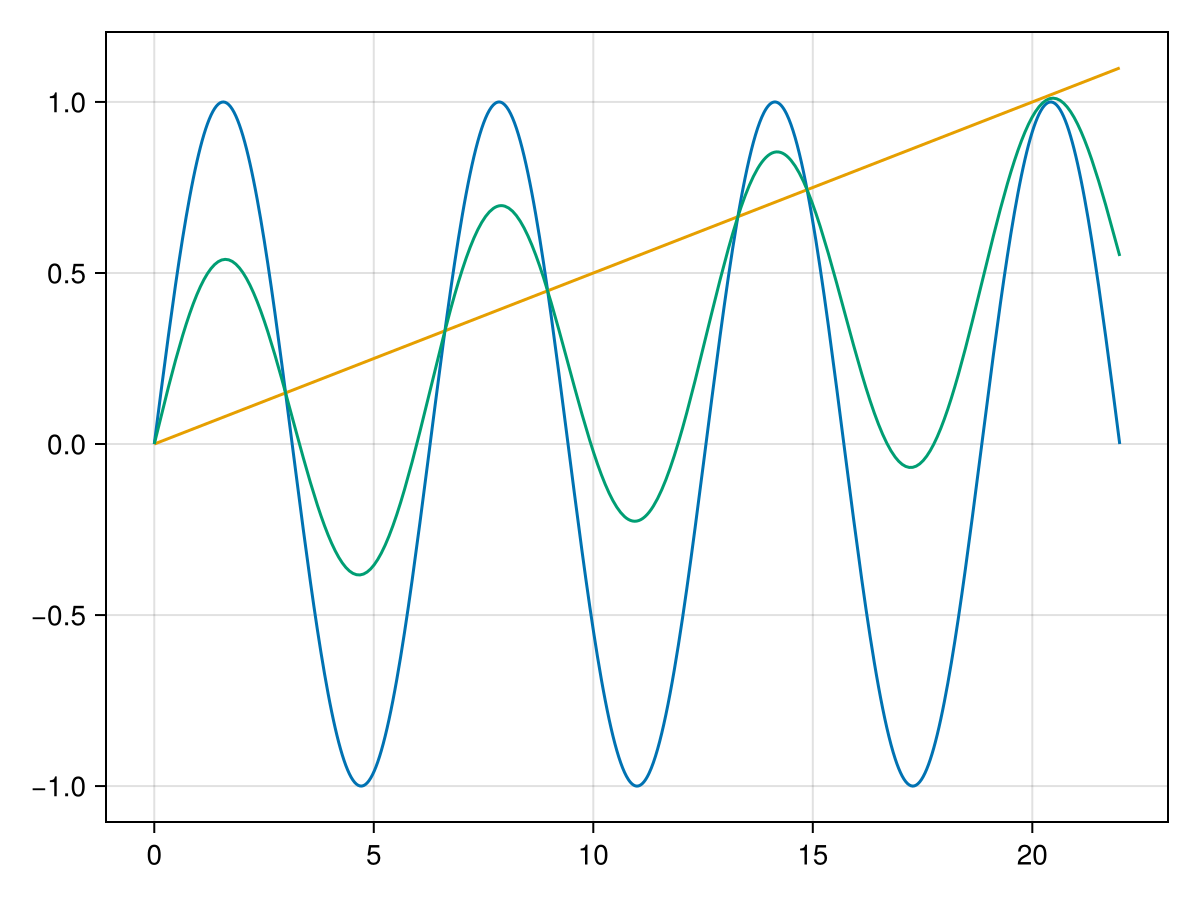

In [2]:
x = parameter(0 .. 7π)
f = sin(x)
u = x / 20
h = (f + u) / 2
fplot(f, u, h)

Ableitungen von Funktionen werden mit der in der Mathematik üblichen Schreibweise gebildet.

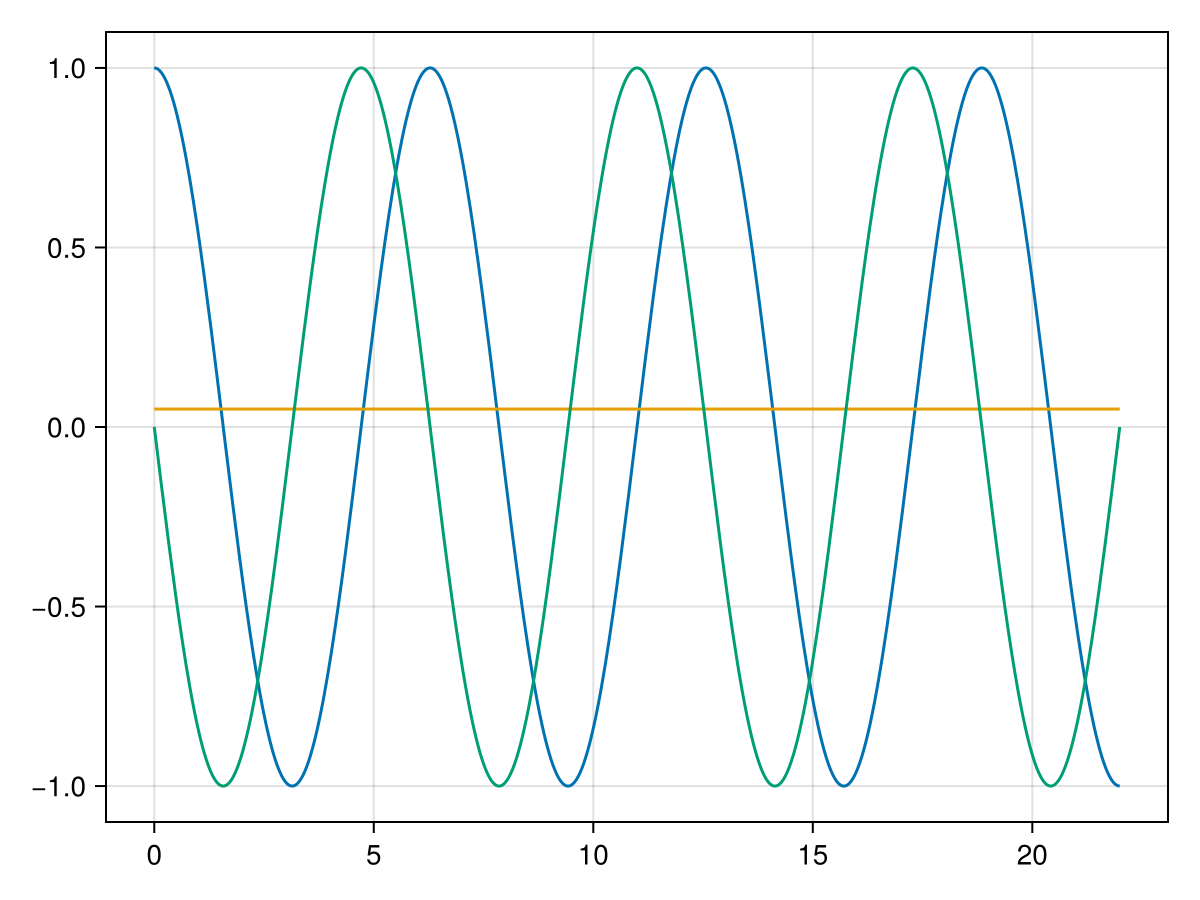

In [3]:
fplot(f', u', f'')

Mit `integrate` werden bestimmte Integrale berechnet, der zweite Parameter legt den Integrationsbereich fest.

In [4]:
integrate(u, 0 .. 20)

10.0

## Differentialgleichungen

Gesucht ist eine beliebige Lösung der DGL $u''(x) + u(x) = 0$ for $0 < x < 4\pi$.

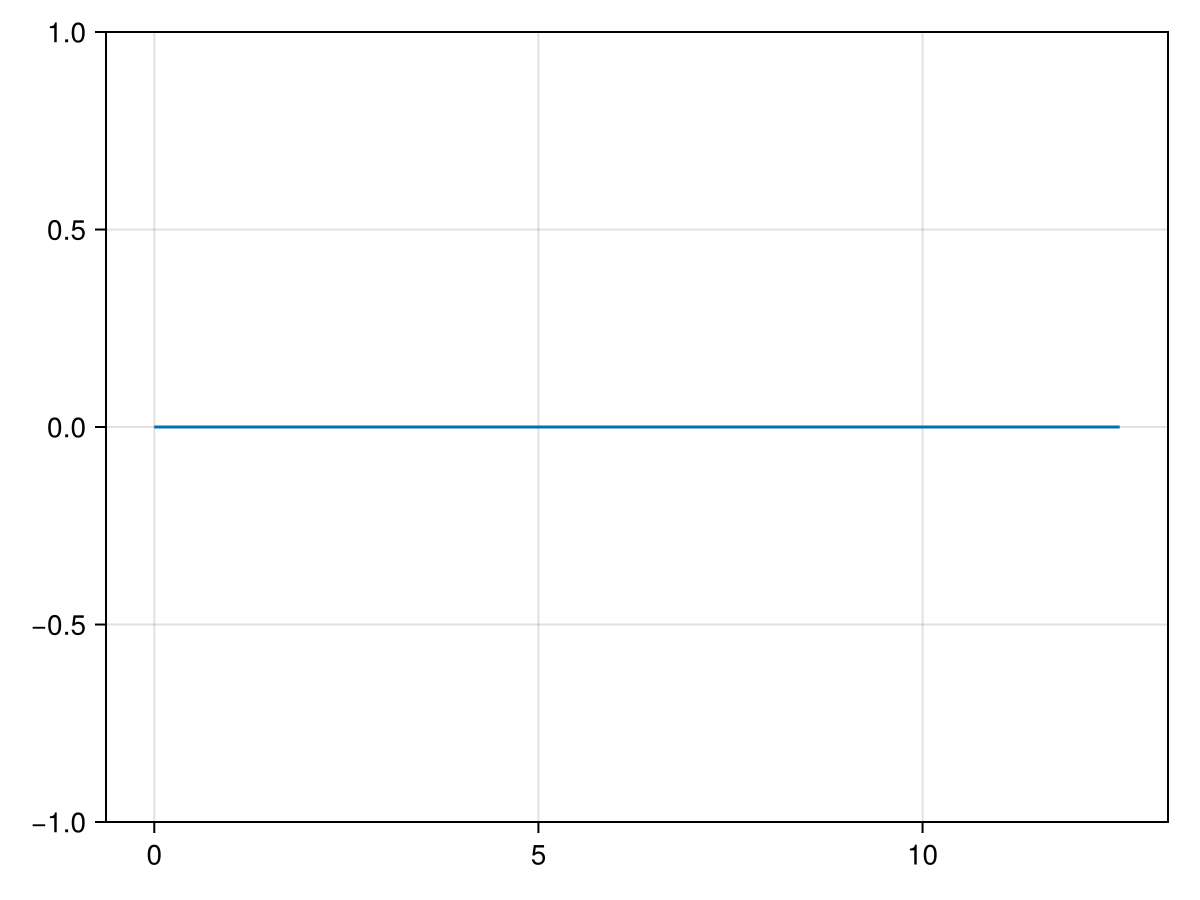

In [5]:
x = parameter(0 .. 4π)
u = 3 * sin(x) + 6 * cos(x)
fplot(u'' + u)

## Randwertproblem Bohrpfahlproblem

Randwertproblem Bohrpfahl (D): Gesucht ist eine Funktion $u: [0, l] \to \R$, die

1. die Differentialgeichung

    $$
        EA u''(x) - C u(x) = -n
    $$

    löst und

1. den Randbedingungen

    $$
        EA u'(0) = -F \quad \text{sowie} \quad EA u'(l) + S u(l) = 0
    $$

    genügt.

Beispielhafte Systemparameter

In [6]:
# Grundgrößen
E = 35e9
d = 0.8
l = 20
F = 2e6
ρ = 2500
g = 9.81
C = 1.75e7 * π * d
S = 120e6

# Abgeleitete Größen
A = π * d^2 / 4
EA = E*A
n = ρ * A * g;

## Exakte Lösung

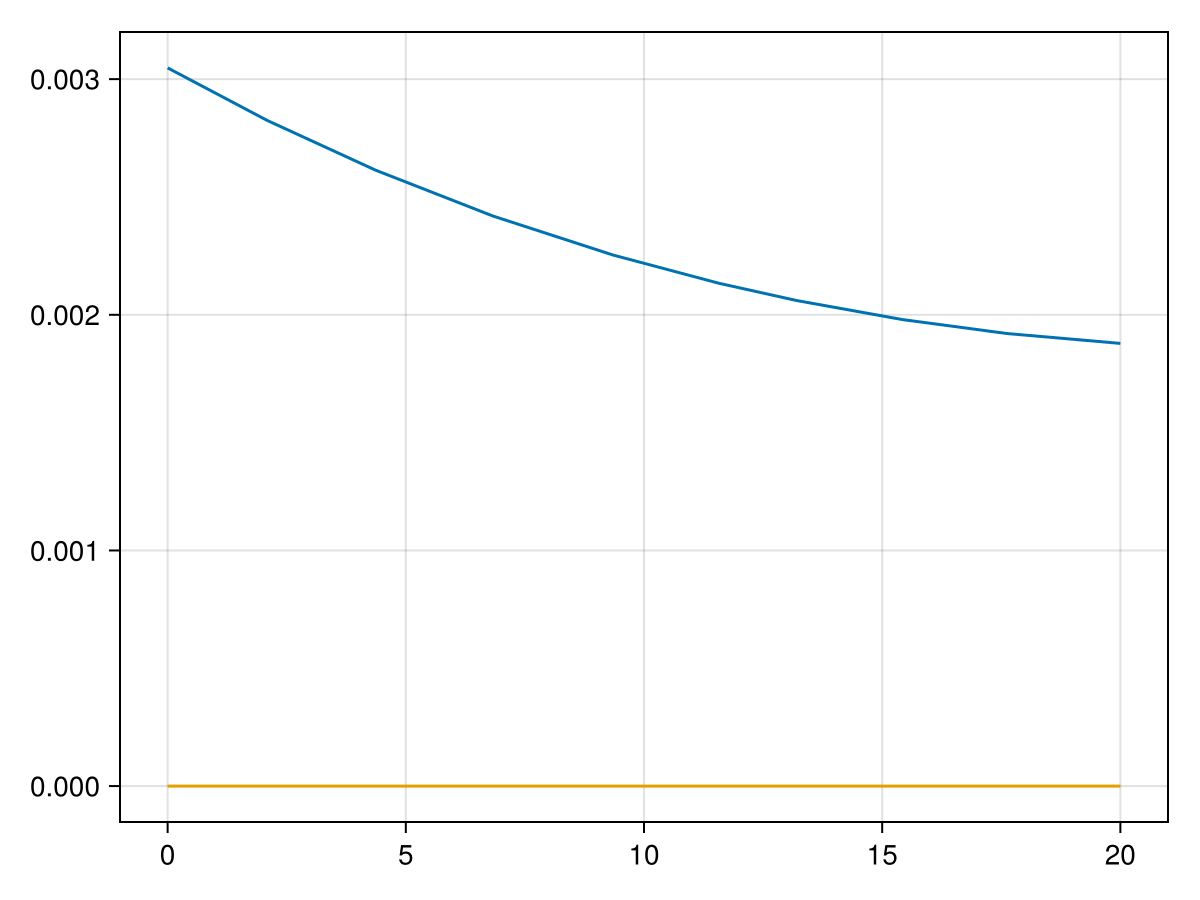

In [7]:
x = parameter(0 .. l)
a1 = 3 + 7 * π
a2 = 7 * π - 3
u = exp(-x / 20) / (3500000 * π * (a1 * ℯ^2 - a2)) * (
    25000 * (a1 * ℯ^2 + a2 * exp(x / 10)) 
    - 2943 * π * ℯ * (exp(x / 10) + 1) 
    +  981 * π * exp(x / 20) * (a1 * ℯ^2 - a2)
)

fplot(u, zero(x), npoints=10)

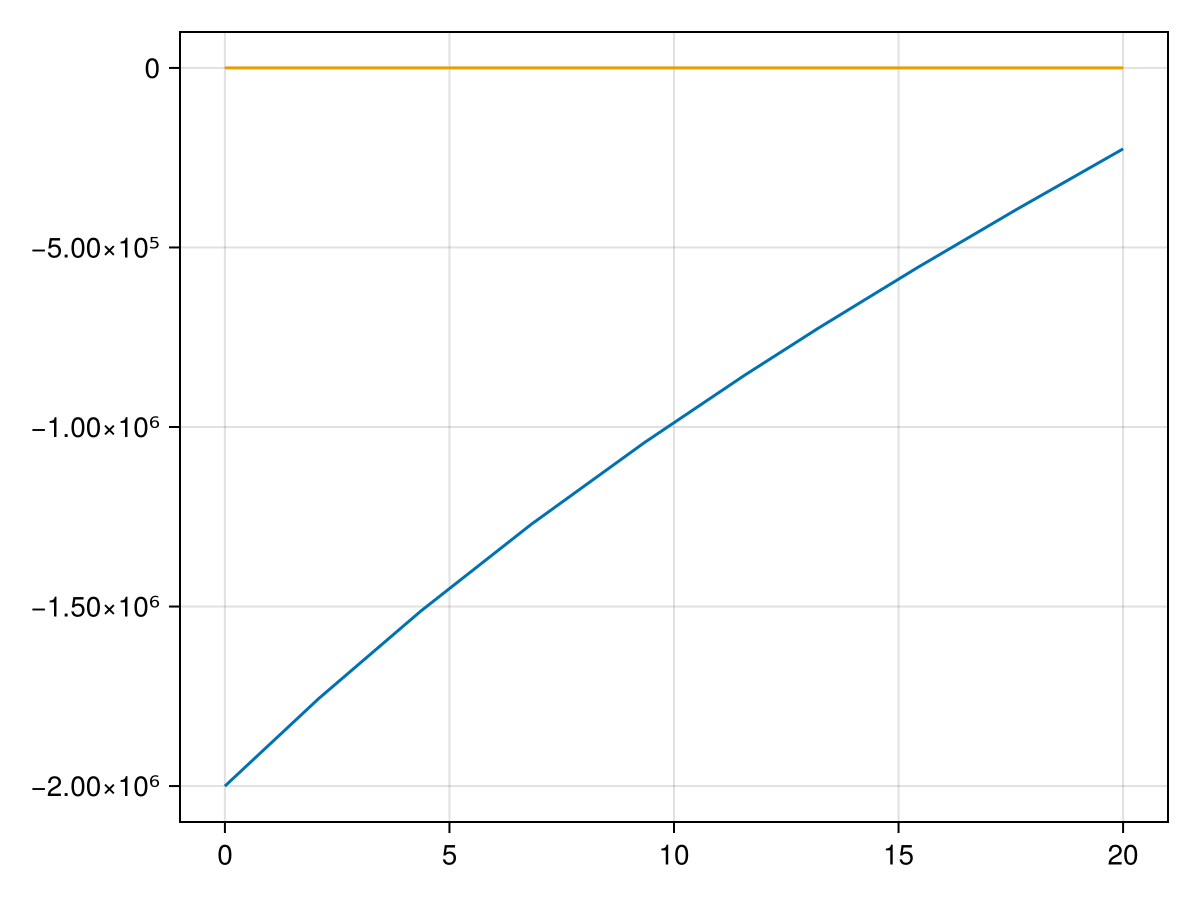

In [8]:
p = fplot(EA * u', zero(x), npoints=10)
p

Kontrolle: Es muss $EA u'(x) - C u(x) + n = 0$ gelten

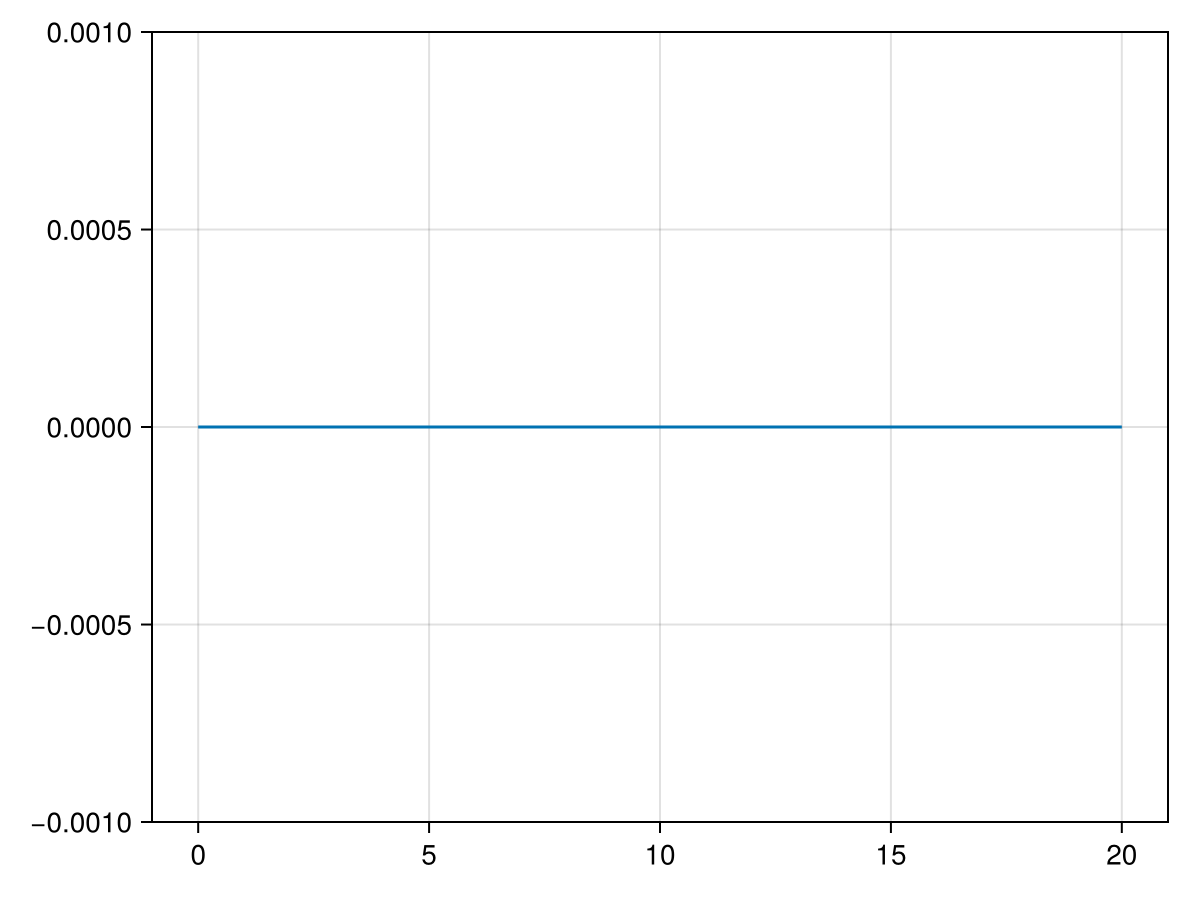

In [9]:
p = fplot(EA * u'' - C * u + n, npoints=100)
ylims!(p.axis, [-0.001, 0.001])
p.figure

In [10]:
println(EA * u'(0) ≈ -F)
println(abs(EA * u'(l) + S * u(l)) < 1e-9)

true
true


## Variationsformulierung Bohrpfahlproblem

Daten und Funktionen zum Testen

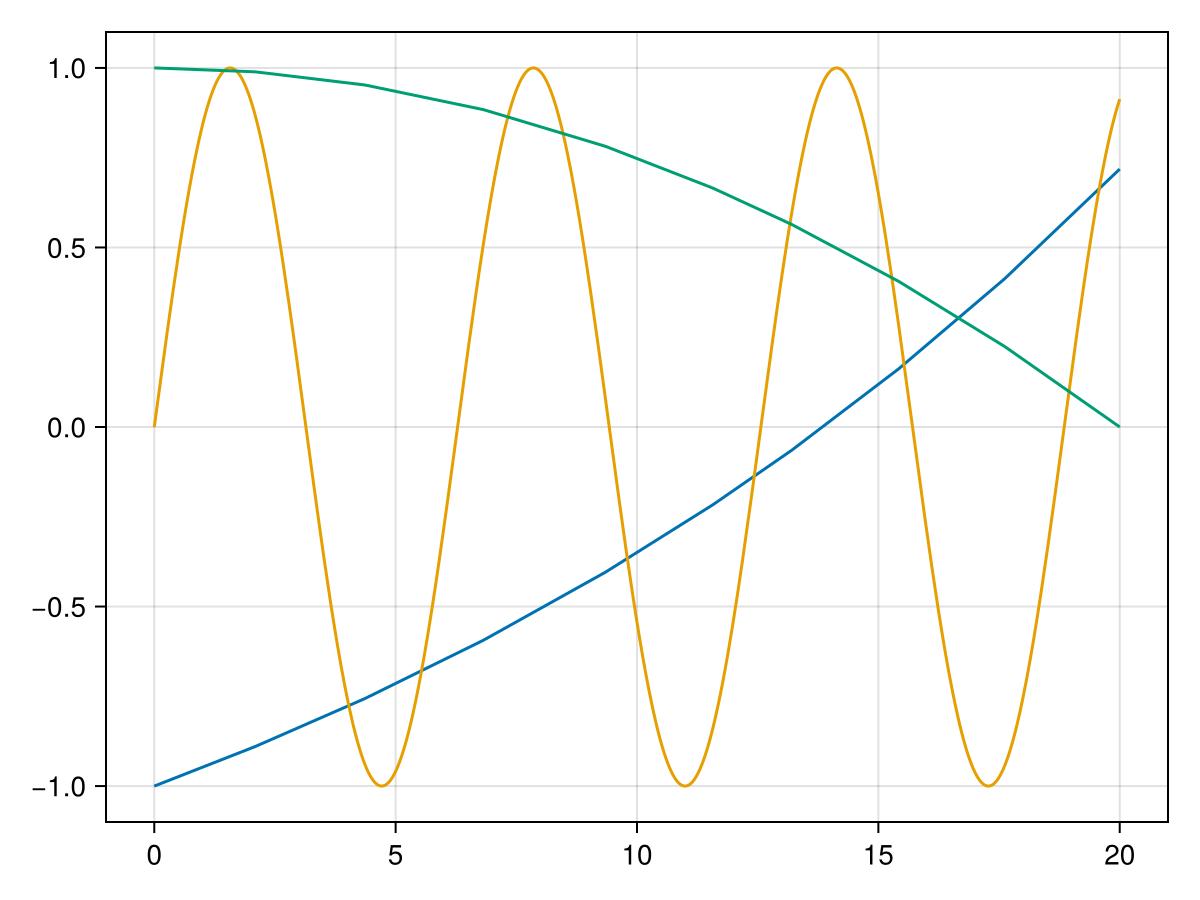

In [11]:
δu = exp(x / l) - 2
v = sin(x)
w = 1 - x^2 / l^2

fplot(δu, v, w, npoints=10)

Rechte Seite

In [12]:
b(δu) = n * integrate(δu, 0 .. l) + F * δu(0)

println(b(δu))
println(b(w))

-2.0694582325657594e6
2.164368127635818e6


Linke Seite

In [13]:
a(u, δu) = EA * integrate(u' * δu', 0 .. l) + C * integrate(u * δu, 0 .. l) + S * u(l) * δu(l)

println(a(u, δu))
println(a(u, w))

-2.0694582325657601e6
2.164368127635819e6


Kontrolle

In [14]:
println(a(u, δu) ≈ b(δu))
println(a(u, v) ≈ b(v))
println(a(u, w) ≈ b(w))

true
true
true


Gegenprobe

In [15]:
println(a(w, δu) ≈ b(δu))

false


Eigenschaften von $b$ und $a$

In [16]:
println(b(3 * u) ≈ 3 * b(u))                  # Linearität
println(b(u + v) ≈ b(u) + b(v))

true
true


In [17]:
println(a(3 * u, v) ≈ 3 * a(u, v))            # Linearität im ersten Parameter
println(a(u, 4 * v) ≈ 4 * a(u, v))
println(a(u + v, w) ≈ a(u, w) + a(v, w))      # Linearität im zweiten Parameter
println(a(u, v + w) ≈ a(u, v) + a(u, w))
println(a(u, v) ≈ a(v, u))                    # Symmetrie
println(a(v, v) > 0)                          # Positive Definitheit
println(a(w, w) > 0)

true
true
true
true
true
true
true


Man kann sich überlegen, dass diese Eigenschaften für (fast) beliebige Funktionen $u, v, w$ erfüllt sind. Man sagt, $b$ ist eine Linearform, $a$ ein Skalarprodukt. Ein Skalarprodukt ist eine Bilinearform, die symmetrisch und positiv definit ist.

Gegenbeispiel

In [18]:
a2(u, δu) = integrate(u, 0 .. l)
a2(u, 3 * δu) ≈ 3 * a2(u, δu)

ErrorException: cannot define function a2; it already has a value